## 1. Introduction: Give the details on the source of your data, its content, and some questions you are interested in. The data should have at least 1000 rows and 4 columns.

#### We have selected the dataset that cotains Corona Virus cases between January 2020 and June 2020 from Kaggle. 
#### It contains 4389 rows and 6 columns. 
#### The group 2 will present Corona Virus tracking the number of confirmed cases, Death toll and Recovered patients in USA. 


#### Source: https://www.kaggle.com/code/khoongweihao/covid-19-novel-coronavirus-eda-forecasting-cases/notebook



In [7]:
# Libraries
import numpy as np
import pandas as pd

#### I have introduced two different methods to import a dataset. 
##### Method 1: Downloading a dataset  in the notebook document on Google Colab.

In [8]:
# Upload your dataset to Google Colab Notebook and import 
df = pd.read_csv( r'/content/forecasts_custom_prophet.csv')

##### Method 2: Mounting Drive to import a dataset.

In [9]:
# run this  code when you saved your dataset in google drive.
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# get the numbers of rows and columns.
print("dimensions of the group2 dataframe = ",df.shape)

dimensions of the group2 dataframe =  (4389, 6)


In [11]:
# Read data on forecats_custom_prophet
# users = pd.read_table('/content/forecasts_custom_prophet.csv')
users = pd.read_csv('/content/forecasts_custom_prophet.csv')
users.shape

(4389, 6)

In [12]:
print(users)

          ObservationDate   Province/State Country/Region  Confirmed  Deaths  \
0     2020-06-04 00:00:00  New South Wales      Australia     4019.0    51.0   
1     2020-06-05 00:00:00  New South Wales      Australia     4082.0    51.0   
2     2020-06-06 00:00:00  New South Wales      Australia     4075.0    52.0   
3     2020-06-07 00:00:00  New South Wales      Australia     4085.0    53.0   
4     2020-06-08 00:00:00  New South Wales      Australia     4121.0    53.0   
...                   ...              ...            ...        ...     ...   
4384                    0                0              0        0.0     0.0   
4385                    0                0              0        0.0     0.0   
4386                    0                0              0        0.0     0.0   
4387                    0                0              0        0.0     0.0   
4388                    0                0              0        0.0     0.0   

      Recovered  
0        3321.0  
1  

## 2. Prepare and wrangle your data with Pandas and Numpy.

In [13]:
# list data types of the dataframe.
df.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [14]:
# Print the dataset.
df.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-06-04 00:00:00,New South Wales,Australia,4019.0,51.0,3321.0
1,2020-06-05 00:00:00,New South Wales,Australia,4082.0,51.0,3465.0
2,2020-06-06 00:00:00,New South Wales,Australia,4075.0,52.0,3494.0
3,2020-06-07 00:00:00,New South Wales,Australia,4085.0,53.0,3493.0
4,2020-06-08 00:00:00,New South Wales,Australia,4121.0,53.0,3480.0


In [15]:
# Check how many null values in the dataset and output.
print('Number of null/NaN values in df: ',df.isnull().values.sum())

Number of null/NaN values in df:  0


In [16]:
# In Region, there is 0 values.

df['Country/Region'].unique()

array(['Australia', '0', 'Brazil', 'Canada', 'Chile', 'Colombia',
       'Denmark', 'France', 'Germany', 'Hong Kong', 'Italy', 'Japan',
       'Macau', 'Mainland China', 'Mexico', 'Netherlands', 'Peru',
       'Russia', 'Spain', 'UK', 'US', 'Ukraine'], dtype=object)

In [17]:
# remove decimals in Confirmed, Deaths and Recovered variables.
df.Confirmed = df.Confirmed.apply(int)
df.Deaths = df.Deaths.apply(int)
df.Recovered = df.Recovered.apply(int)
print(df)

          ObservationDate   Province/State Country/Region  Confirmed  Deaths  \
0     2020-06-04 00:00:00  New South Wales      Australia       4019      51   
1     2020-06-05 00:00:00  New South Wales      Australia       4082      51   
2     2020-06-06 00:00:00  New South Wales      Australia       4075      52   
3     2020-06-07 00:00:00  New South Wales      Australia       4085      53   
4     2020-06-08 00:00:00  New South Wales      Australia       4121      53   
...                   ...              ...            ...        ...     ...   
4384                    0                0              0          0       0   
4385                    0                0              0          0       0   
4386                    0                0              0          0       0   
4387                    0                0              0          0       0   
4388                    0                0              0          0       0   

      Recovered  
0          3321  
1  

In [18]:
# Remove the count column from the dataframe
df = df.set_index('ObservationDate')
print(df)

                      Province/State Country/Region  Confirmed  Deaths  \
ObservationDate                                                          
2020-06-04 00:00:00  New South Wales      Australia       4019      51   
2020-06-05 00:00:00  New South Wales      Australia       4082      51   
2020-06-06 00:00:00  New South Wales      Australia       4075      52   
2020-06-07 00:00:00  New South Wales      Australia       4085      53   
2020-06-08 00:00:00  New South Wales      Australia       4121      53   
...                              ...            ...        ...     ...   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   

                     Recovered  
Obse

In [19]:
df= df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'})

In [20]:
# drop rows by condition. 0 values are removed.
df=df[df.Country !='0']

In [21]:
print("number of rows and colummns in our df after drop 0 = ", df.shape)

number of rows and colummns in our df after drop 0 =  (2364, 5)


In [22]:
df.describe(include='all')

,State,Country,Confirmed,Deaths,Recovered
count,2364,2364,2.364000e+03,2364.000000,2.364000e+03
unique,532,21,NaN,NaN,NaN
top,Unknown,US,NaN,NaN,NaN
freq,23,1019,NaN,NaN,NaN
mean,NaN,NaN,2.363147e+04,1209.284687,2.546793e+04
std,NaN,NaN,1.368274e+05,10152.904756,2.224601e+05
min,NaN,NaN,0.000000e+00,0.000000,0.000000e+00
25%,NaN,NaN,6.000000e+00,0.000000,0.000000e+00
50%,NaN,NaN,1.940000e+02,3.000000,0.000000e+00
75%,NaN,NaN,7.986750e+03,143.250000,4.400000e+02


In [23]:
df.describe()

,Confirmed,Deaths,Recovered
count,2.364000e+03,2364.000000,2.364000e+03
mean,2.363147e+04,1209.284687,2.546793e+04
std,1.368274e+05,10152.904756,2.224601e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,6.000000e+00,0.000000,0.000000e+00
50%,1.940000e+02,3.000000,0.000000e+00
75%,7.986750e+03,143.250000,4.400000e+02
max,3.242818e+06,382980.000000,4.657437e+06


In [24]:
df.Country.value_counts() #show the amount of rows for each country

US                1019
Mainland China     217
Japan              183
Canada             126
Russia             110
UK                  85
Colombia            70
Peru                70
Australia           69
France              67
Brazil              58
Ukraine             50
Mexico              46
Spain               41
Chile               39
Italy               32
Netherlands         29
Germany             24
Denmark             15
Macau                7
Hong Kong            7
Name: Country, dtype: int64

In [25]:
# displayiny the variable of the dataset
df.dtypes

State        object
Country      object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

In [26]:
df_2=pd.get_dummies(df_1)
df_2.head()

NameError: ignored

## 3. Use EDA principles and the Matplotlib/Seaborn packages to visualize the data.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

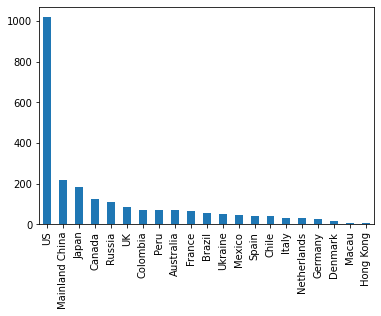

In [93]:
# plot a bar chart showing the number rows for each country.
df.Country.value_counts().plot(kind='bar')

## 4. Use at least two of the following depending on your question of interest: pairplot, histogram, barplot, boxplot, or scatterplot.

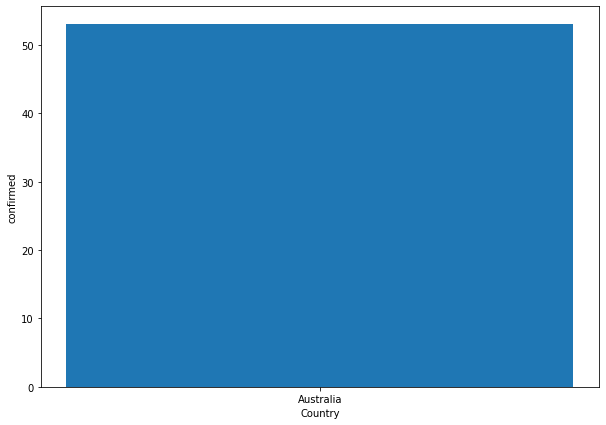

In [103]:
# Plot the data using bar()
data = pd.DataFrame(df)
country = data['Country'].head(12)
deaths = data['Deaths'].head(12) 
# Figure Size
fig = plt.figure(figsize =(10, 7)) 
# Horizontal Bar Plot
plt.bar(country[0:10], deaths[0:10])
plt.xlabel('Country')
plt.ylabel('confirmed') 
# Show Plot
plt.show()

In [35]:
world = df.groupby("Country")['Confirmed','Recovered','Deaths'].sum().reset_index()
world

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country,Confirmed,Recovered,Deaths
0,Australia,63874,58696,841
1,Brazil,16650887,6813247,472246
2,Canada,694926,545762,56704
3,Chile,1823707,265641,56454
4,Colombia,111097,152266,9182
5,Denmark,16356,1442,55
6,France,1355589,18963,18338
7,Germany,1592669,1817240,32040
8,Hong Kong,9064,7445,28
9,Italy,3631608,1242450,109042


In [36]:
US = world.loc[20]
US

Country      Ukraine
Confirmed     577423
Recovered     189446
Deaths          8349
Name: 20, dtype: object

## 5. Simulate a nonparametric inference of the Median for a quantitative variable in the dataset.

In [37]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [38]:
# Selecting and filtering US rows and columns.
df.shape

(2364, 5)

In [39]:
df.columns

Index(['State', 'Country', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [40]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 2364 entries, 2020-06-04 00:00:00 to 2020-06-08 00:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      2364 non-null   object
 1   Country    2364 non-null   object
 2   Confirmed  2364 non-null   int64 
 3   Deaths     2364 non-null   int64 
 4   Recovered  2364 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 652.6 KB


### Bootstrap Sampling in Python and generate random sample.

In [53]:
arr=pd.read_csv('/content/forecasts_custom_prophet.csv',header=0, usecols = ["Country/Region","Confirmed","Deaths"])
arr

,Country/Region,Confirmed,Deaths
0,Australia,4019.0,51.0
1,Australia,4082.0,51.0
2,Australia,4075.0,52.0
3,Australia,4085.0,53.0
4,Australia,4121.0,53.0
...,...,...,...
4384,0,0.0,0.0
4385,0,0.0,0.0
4386,0,0.0,0.0
4387,0,0.0,0.0


In [54]:
arr.shape

(4389, 3)

In [57]:
arr= arr.rename(columns={'Country/Region':'Country'})

In [59]:
arr.Country.unique()

array(['Australia', '0', 'Brazil', 'Canada', 'Chile', 'Colombia',
       'Denmark', 'France', 'Germany', 'Hong Kong', 'Italy', 'Japan',
       'Macau', 'Mainland China', 'Mexico', 'Netherlands', 'Peru',
       'Russia', 'Spain', 'UK', 'US', 'Ukraine'], dtype=object)

In [61]:
arr_data_list = ['US']
arr_us = arr[arr.Country.isin(arr_data_list)]
print(arr_us)

     Country  Confirmed  Deaths
2947      US    22773.0  1151.0
2948      US    23099.0  1165.0
2949      US    23485.0  1181.0
2950      US    23809.0  1187.0
2951      US    24032.0  1195.0
...      ...        ...     ...
4195      US        0.0     0.0
4196      US        0.0     0.0
4197      US        0.0     0.0
4198      US        0.0     0.0
4199      US        0.0     0.0

[1019 rows x 3 columns]


In [71]:
# remove decimals in Confirmed, Deaths variables.
arr_us.Confirmed = arr_us.Confirmed.apply(int)
arr_us.Deaths = arr_us.Deaths.apply(int)
print(arr_us)

     Country  Confirmed  Deaths
2947      US      22773    1151
2948      US      23099    1165
2949      US      23485    1181
2950      US      23809    1187
2951      US      24032    1195
...      ...        ...     ...
4195      US          0       0
4196      US          0       0
4197      US          0       0
4198      US          0       0
4199      US          0       0

[1019 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
coltolist1 = arr_us['Confirmed'].unique()
coltolist1

In [86]:
from scipy.stats import bootstrap
import numpy as np
import random

In [87]:
np.mean(coltolist1)

28564.745614035088

In [78]:
sample_mean = []
for i in range(1000):
  y=random.sample(coltolist1.tolist(),4)
  avg = np.mean(y)
  sample_mean.append(avg)

In [85]:
print(np.mean(sample_mean))

27190.07725


In [90]:

#convert array to sequence
coltolist1 = (coltolist1,)

#calculate 95% bootstrapped confidence interval for median
bootstrap_ci = bootstrap(coltolist1, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(bootstrap_ci.confidence_interval)


ConfidenceInterval(low=8811.0, high=11520.5)


## 6. The sample size should be about 10% of the data. Use random sampling for the rows.

In [82]:
subset = df.sample(frac=0.1) #created subset of data using 10% sample size of data
print(subset)

                                           State  Country  Confirmed  Deaths  \
ObservationDate                                                                
2020-06-04 00:00:00                       Kagawa    Japan         28       0   
2020-06-05 00:00:00                      Mayotte   France       2054      27   
2020-06-06 00:00:00             Karelia Republic   Russia       3590      23   
2020-06-10 00:00:00  Falkland Islands (Malvinas)       UK         13       0   
2020-06-08 00:00:00                 North Dakota       US       2926      72   
...                                          ...      ...        ...     ...   
2020-06-10 00:00:00                    Greenland  Denmark         12       0   
2020-03-11 00:00:00           Chatham County, NC       US          1       0   
2020-03-16 00:00:00        Williamson County, TN       US          1       0   
2020-06-10 00:00:00                   New Jersey       US     169661   12602   
2020-06-09 00:00:00                   Gu

In [83]:
subset.Country.value_counts() #value counts for each country

US                111
Japan              19
Mainland China     17
UK                 10
Canada              9
Russia              8
Colombia            8
France              7
Australia           6
Chile               6
Ukraine             6
Italy               5
Spain               4
Brazil              4
Netherlands         4
Mexico              4
Denmark             3
Germany             2
Peru                2
Hong Kong           1
Name: Country, dtype: int64

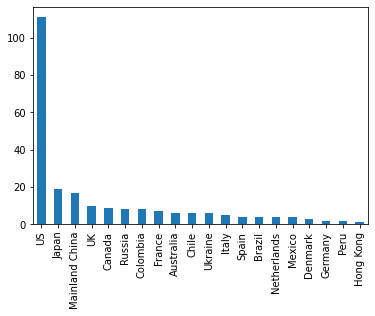

In [84]:
subset.Country.value_counts().plot(kind='bar') #plotted subset of confirmed cases

## 7. Submit a link to the GitHub RUR.

## 8. Present in the class